In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.set_printoptions(precision=3,suppress=True)

In [52]:
#L = np.array([[-1,1,0],[1,-2,1],[0,1,-1]])
N  = 100
L = np.zeros([N,N])
for i in range(1,N-1):
    L[i,i]=-2
    L[i-1,i]=1
    L[i+1,i]=1
L[0,0]=-1
L[1,0]=1
L[-1,-1]=-1
L[-2,-1]=1
L    

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -1.]])

In [63]:
#L = np.array([[-1,1,0],[1,-2,1],[0,1,-1]])
#L = np.array([[-1,1,0,0],[1,-3,2,0],[0,2,-3,1],[0,0,1,-1]])
N  = 20
L = np.zeros([N*N,N*N])


In [64]:

for i in range(1,N-1):
    for j in range(1,N-1):
        L[i+j*N,i+j*N] = -4
        L[i+j*N-1,i+j*N] = 1
        L[i+j*N+1,i+j*N] = 1
        L[i+j*N,i+j*N-1] = 1
        L[i+j*N,i+j*N+1] = 1
        L[i+(j-1)*N,i+j*N] = 1
        L[i+(j+1)*N,i+j*N] = 1
        L[i+j*N,i+(j-1)*N] = 1
        L[i+j*N,i+(j+1)*N] = 1
    

In [57]:
lineA = 10
lineB = 5
for i in range(2,N-2):
    L[i+lineA*N,i+lineA*N]-=4
    L[i+lineA*N-4,i+lineA*N  ]+=2
    L[i+lineA*N,  i+lineA*N-4]+=2
    L[i*N+lineB,  i*N+lineB]-=4
    L[i*N+lineB-4*N,i*N+lineB  ]+=2
    L[i*N+lineB,  i*N+lineB-4*N]+=2
    #L[i+10*N+1,i+10*N  ]+=1
    #L[i+10*N,  i+10*N+1]+=1

In [65]:
def eBL(L,beta=1,s=100):
    return np.linalg.matrix_power(np.eye(L.shape[0])+beta*L/s,s)

#eigvals, eigvects = np.linalg.eig(L)

In [66]:
eBLval = eBL(L)

In [126]:
def K(x1,x2):
    return np.exp((-(x1[0]-x2[0])**2-(x1[1]-x2[1])**2)/(2*1**2))
cov = np.zeros([N*N,N*N])
i1=0
for x11 in np.arange(N):#enumerate(np.repeat(np.arange(N)[:,None],N,axis=1).flatten()):
    for x12 in np.arange(N):
        
        i2=0
        for x21 in np.arange(N):#enumerate(np.repeat(np.arange(N)[:,None],N,axis=1).flatten()):
            for x22 in np.arange(N):
                
                #print(i1,i2,":",x11,x12,x21,x22)
                cov[i1,i2]=K([x11,x12],[x21,x22])
                i2+=1
        i1+=1
        #L[i1,i2] = K(x1,x2)

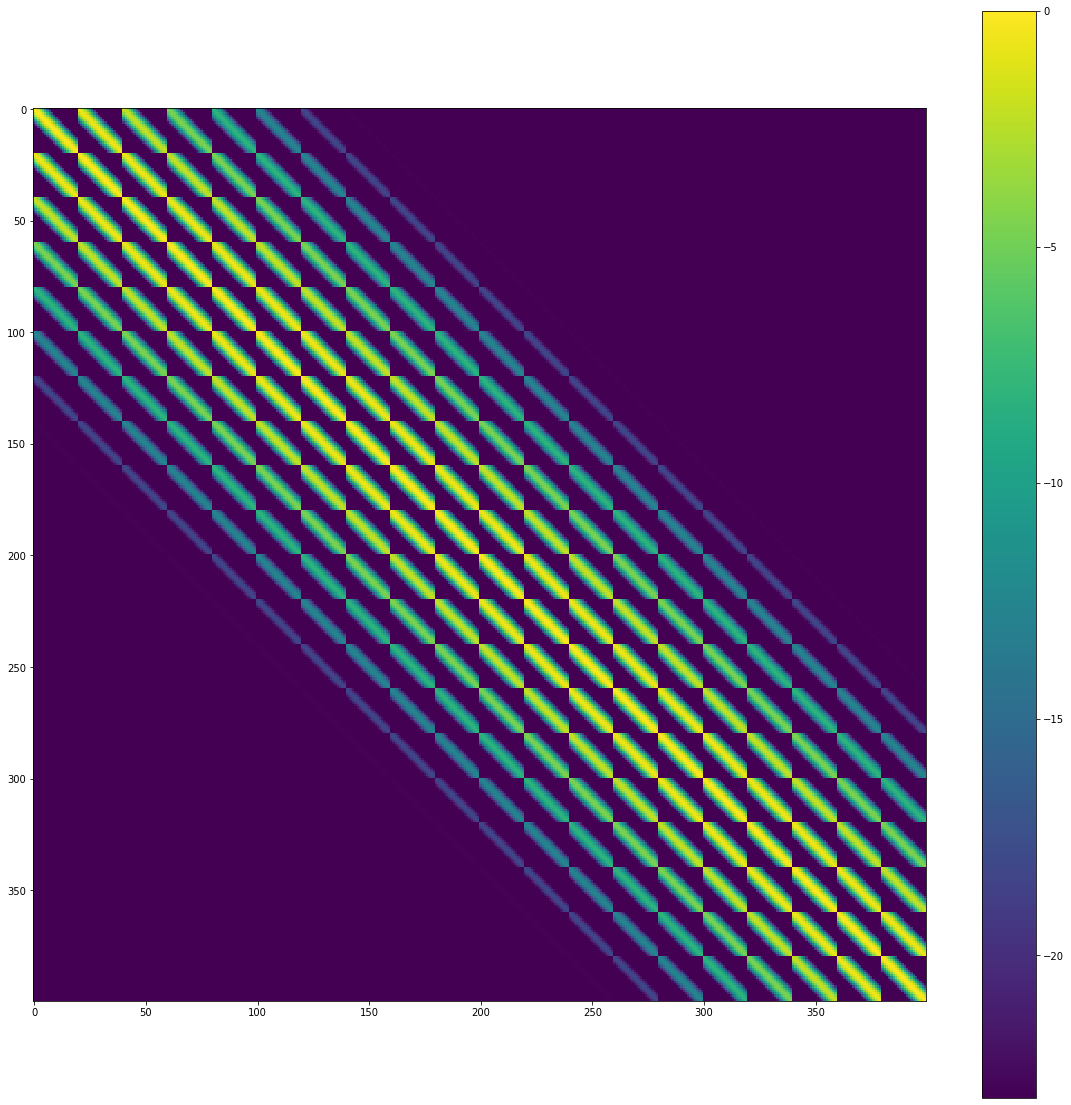

In [127]:
plt.figure(figsize=[20,20])
plt.imshow(np.log(1e-10+cov))
plt.colorbar()
#plt.clim([0,0.01])

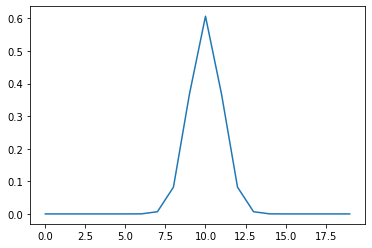

In [128]:
plt.plot(cov[10,20:40])

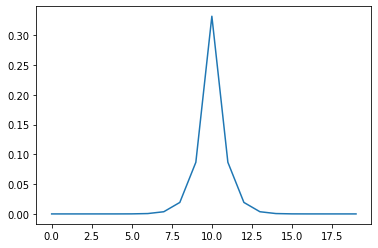

In [129]:
plt.plot(eBLval[10,20:40])

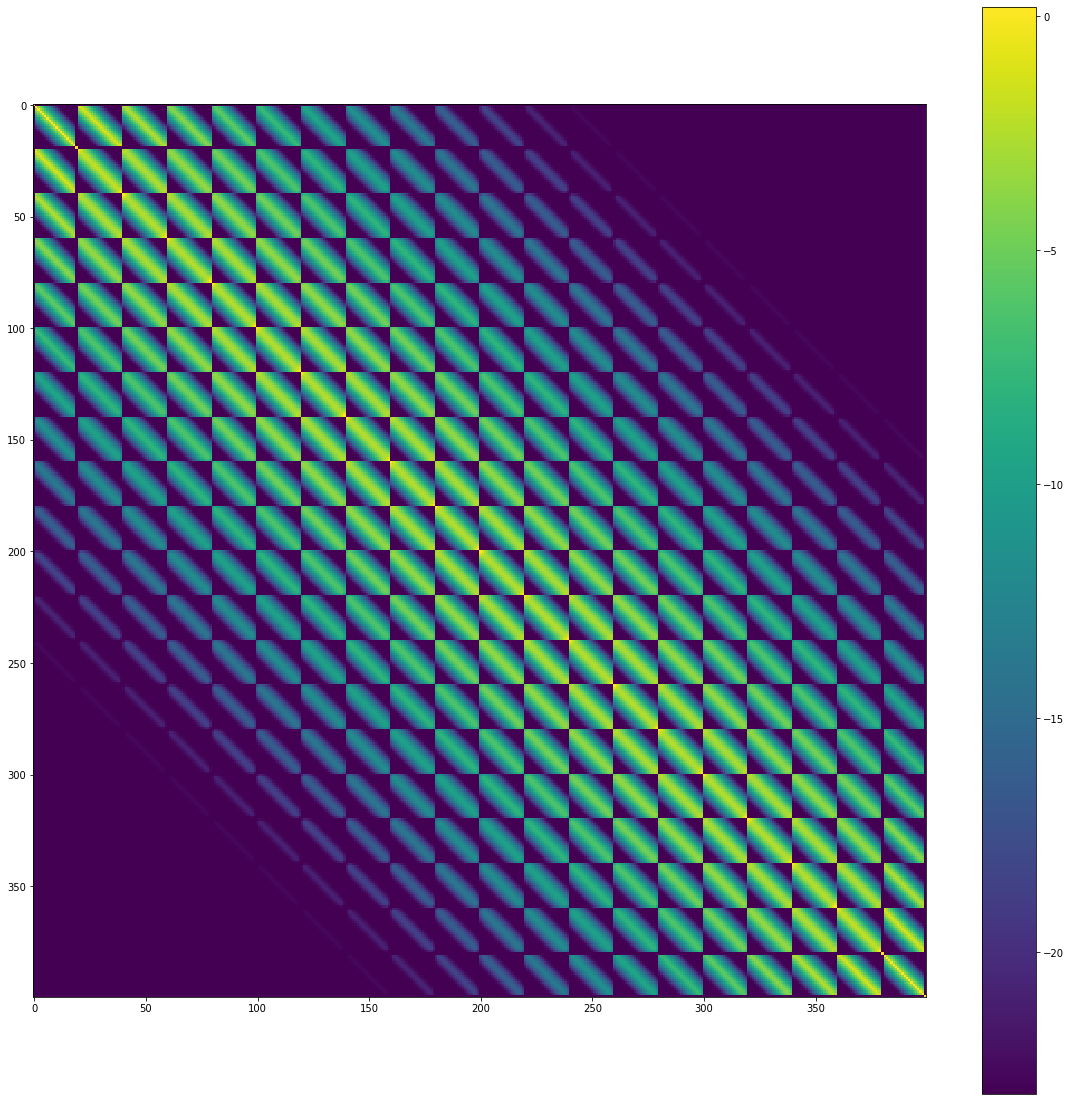

In [67]:
plt.figure(figsize=[20,20])
plt.imshow(np.log(1e-10+eBLval))
plt.colorbar()
#plt.clim([0,0.01])

In [5]:
#plt.matshow(L @ eBL(L))
#plt.colorbar()
#plt.clim([0,0.1])

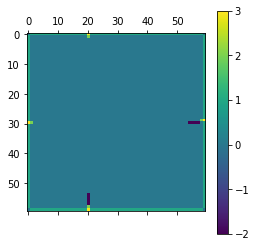

In [6]:
plt.matshow(np.sum(L,0).reshape(N,N))
plt.colorbar()

In [14]:
init = init.reshape(N,N).flatten()[:,None]

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


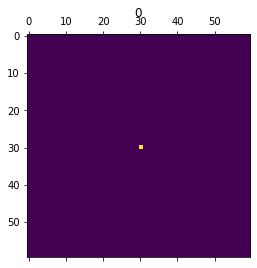

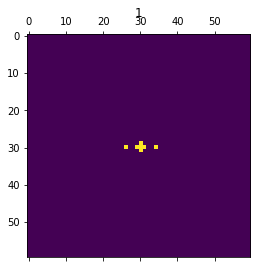

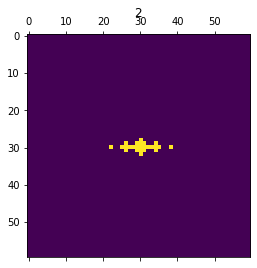

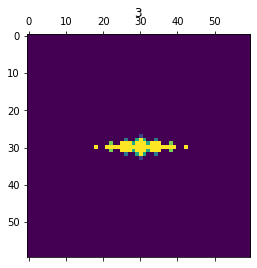

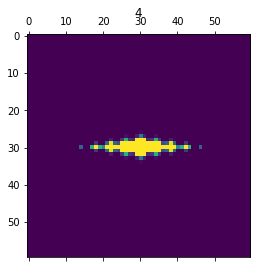

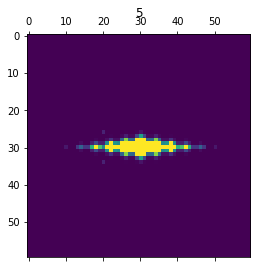

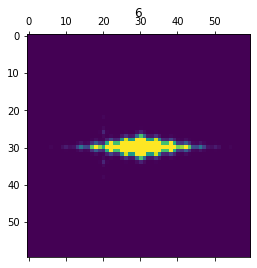

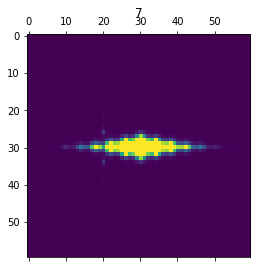

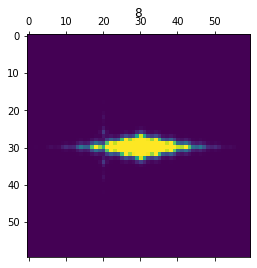

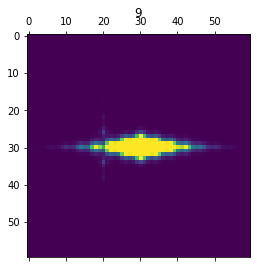

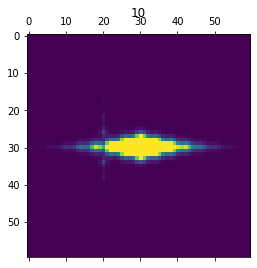

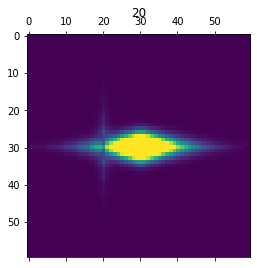

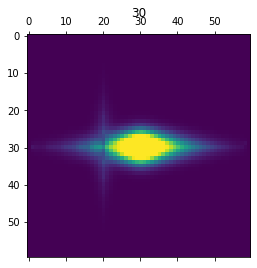

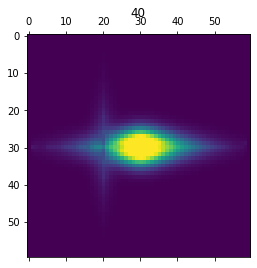

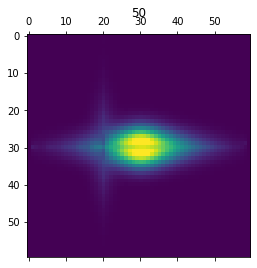

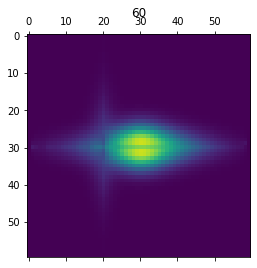

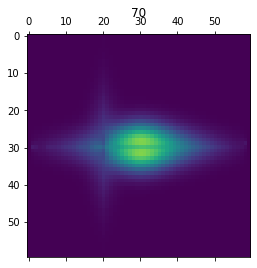

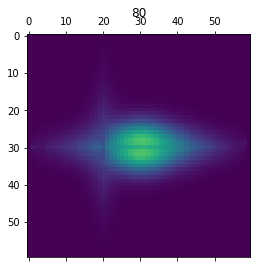

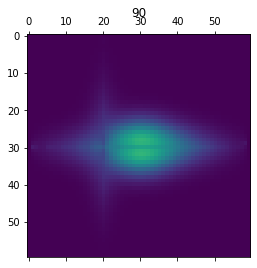

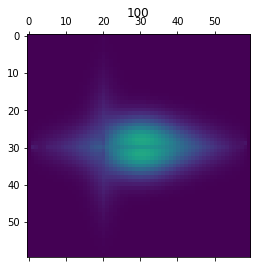

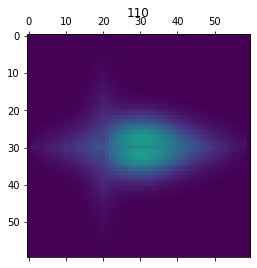

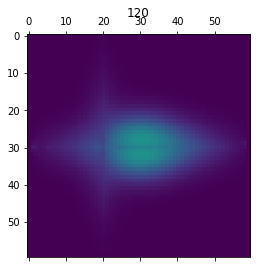

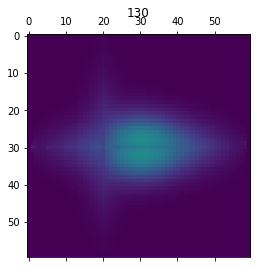

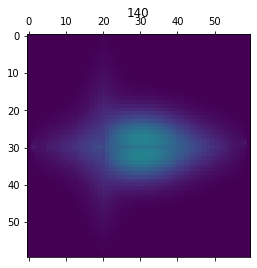

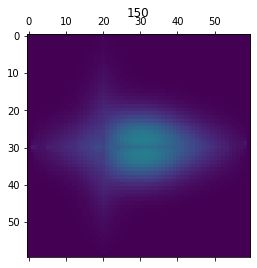

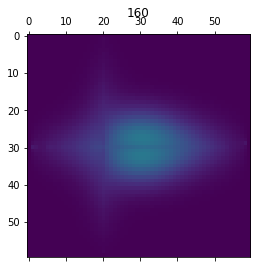

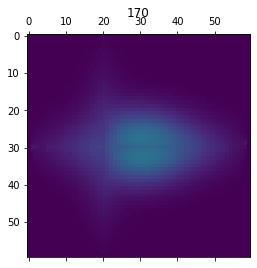

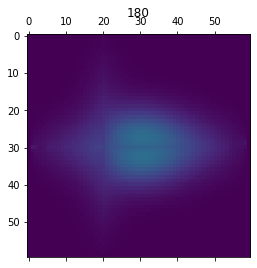

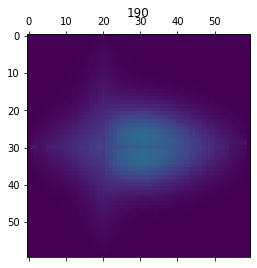

In [20]:
init = np.zeros(N*N)[:,None]
init[30+30*N]=100
for i in range(200):
    #plt.subplot(3,3,i+1)
    if (i%10==0) or (i<10):
        plt.matshow(init.reshape(N,N))
        plt.clim([0,0.5])
        plt.title(i)
        #plt.colorbar()
    init = init + (L@init)*0.1
    init = init.reshape(N,N)
    init[:,0]=0
    init[0,:]=0
    init[:,-1]=0
    init[-1,:]=0
    init=init.flatten()[:,None]
    

In [168]:
L = np.array([[-1,1,0,0],[1,-3,2,0],[0,2,-3,1],[0,0,1,-1]])
beta = 0.01
for s in [0,1,2,3,10000]:
    print(s,(eBL(L,s=s)@np.array([[1,0,0,0]]).T).T)

0 [[1. 0. 0. 0.]]
1 [[0. 1. 0. 0.]]
2 [[0.5 0.  0.5 0. ]]
3 [[0.444 0.333 0.148 0.074]]
10000 [[0.505 0.268 0.165 0.063]]


/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [169]:
v = np.array([1,0,0,0])
for it in range(1000):
    v[0]=1
    v = v + (v@L)/100
    v = v - 0.087*v
    if it%100==0: print(v)

[0.904 0.009 0.    0.   ]
[0.905 0.082 0.013 0.001]
[0.905 0.082 0.013 0.001]
[0.905 0.082 0.013 0.001]
[0.905 0.082 0.013 0.001]
[0.905 0.082 0.013 0.001]
[0.905 0.082 0.013 0.001]
[0.905 0.082 0.013 0.001]
[0.905 0.082 0.013 0.001]
[0.905 0.082 0.013 0.001]


In [134]:
((eBL(L,beta=0.02)) - (eBL(L,beta=0.01)))/0.01

array([[-0.971,  0.942,  0.028,  0.   ],
       [ 0.942, -2.798,  1.828,  0.028],
       [ 0.028,  1.828, -2.798,  0.942],
       [ 0.   ,  0.028,  0.942, -0.971]])

In [76]:
L @ eBL(L,beta=0.015)

array([[-0.97,  0.94,  0.03,  0.  ],
       [ 0.94, -2.8 ,  1.83,  0.03],
       [ 0.03,  1.83, -2.8 ,  0.94],
       [ 0.  ,  0.03,  0.94, -0.97]])

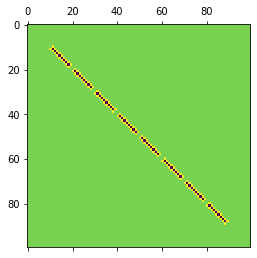

In [9]:
plt.matshow(L)